<a href="https://colab.research.google.com/github/mmartigani/MachineLearning2/blob/main/ML34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import hashlib
import random
import uuid
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.utils import resample
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from scipy.cluster.hierarchy import dendrogram , linkage
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [3]:
  df=pd.read_csv('/content/clientes.csv')
  df

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,62,0,61050
1,James Jones,729 Neruda,65,1,53824
2,Patricia Wilson,935 Dickinson,18,0,60281
3,Elizabeth Robinson,459 Rilke,21,1,42187
4,Charles Brown,823 Ginsberg,21,1,37589
...,...,...,...,...,...
195,Barbara Jones,747 Eliot,47,0,51931
196,Richard Brown,673 Tagore,39,1,47712
197,Mary Garcia,617 Neruda,64,1,45261
198,James Wilson,236 Keats,43,1,46787


In [4]:
#eliminamos el campo direccion
df.drop(['direccion'], axis=1, inplace=True)
df

,nombre,edad,categoria,salario
0,Richard Martin,62,0,61050
1,James Jones,65,1,53824
2,Patricia Wilson,18,0,60281
3,Elizabeth Robinson,21,1,42187
4,Charles Brown,21,1,37589
...,...,...,...,...
195,Barbara Jones,47,0,51931
196,Richard Brown,39,1,47712
197,Mary Garcia,64,1,45261
198,James Wilson,43,1,46787


In [6]:
#redondeamos la edad
df['edad']=(df['edad'] // 10)*10
df

,nombre,edad,categoria,salario
0,Richard Martin,60,0,61050
1,James Jones,60,1,53824
2,Patricia Wilson,10,0,60281
3,Elizabeth Robinson,20,1,42187
4,Charles Brown,20,1,37589
...,...,...,...,...
195,Barbara Jones,40,0,51931
196,Richard Brown,30,1,47712
197,Mary Garcia,60,1,45261
198,James Wilson,40,1,46787


In [7]:
#agregacion del ruido al campo salario
ruido = np.random.normal(0,100, size=df['salario'].shape)
df['salario']+= ruido
df

,nombre,edad,categoria,salario
0,Richard Martin,60,0,61087.397372
1,James Jones,60,1,53841.908040
2,Patricia Wilson,10,0,60210.888120
3,Elizabeth Robinson,20,1,42055.514381
4,Charles Brown,20,1,37595.228589
...,...,...,...,...
195,Barbara Jones,40,0,52026.037751
196,Richard Brown,30,1,47944.024041
197,Mary Garcia,60,1,45233.727752
198,James Wilson,40,1,46818.922326


In [8]:
#pseudonimizal el campo nombre
for i in range(len(df)):
  df.loc[i, 'nombre']='Cliente' +str(i)
df.head()

,nombre,edad,categoria,salario
0,Cliente0,60,0,61087.397372
1,Cliente1,60,1,53841.908040
2,Cliente2,10,0,60210.888120
3,Cliente3,20,1,42055.514381
4,Cliente4,20,1,37595.228589


In [9]:
#balancear los datos de categorias
agrupado =df.groupby('categoria')
df_balanceado=pd.DataFrame()
for nombre, grupo in agrupado:
  grupo_balanceado=resample(grupo, replace=True,n_samples=100, random_state=123)
  df_balanceado=pd.concat([df_balanceado, grupo_balanceado])
df_balanceado

,nombre,edad,categoria,salario
158,Cliente158,50,0,41674.058229
42,Cliente42,30,0,59674.455769
194,Cliente194,40,0,49693.218377
133,Cliente133,50,0,41972.830416
114,Cliente114,60,0,53535.221567
...,...,...,...,...
179,Cliente179,40,1,54122.258446
80,Cliente80,10,1,56031.378425
93,Cliente93,50,1,49400.079946
156,Cliente156,50,1,48176.122406


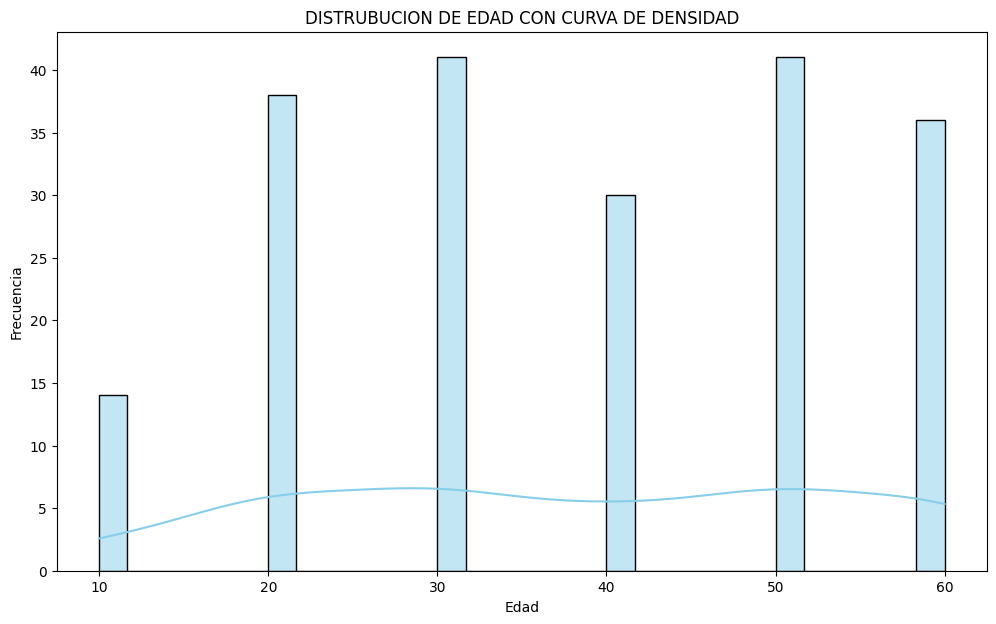

In [10]:
#distribucion de las edades con curva de densidad
plt.figure(figsize=(12,7))
ax=sns.histplot(df['edad'],kde=True,color='skyblue',bins=30)
ax.set(title='DISTRUBUCION DE EDAD CON CURVA DE DENSIDAD',
       xlabel='Edad',
       ylabel='Frecuencia');

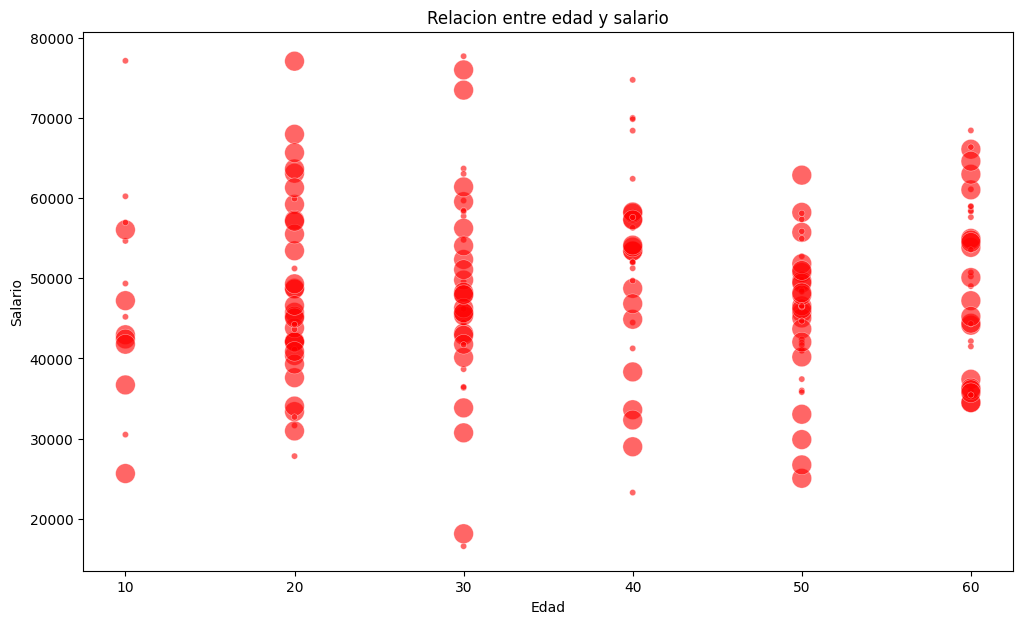

In [11]:
#relacion entre edad y salario con tamaño de variable
plt.figure(figsize=(12,7))
sizes=df['categoria'].replace({0:50,1:100})
scatter =sns.scatterplot(x='edad', y='salario',size=sizes,
                         legend=False,sizes=(20,200),
                         data=df,color='red',alpha=0.6)
scatter.set(title='Relacion entre edad y salario',
            xlabel='Edad', ylabel='Salario');


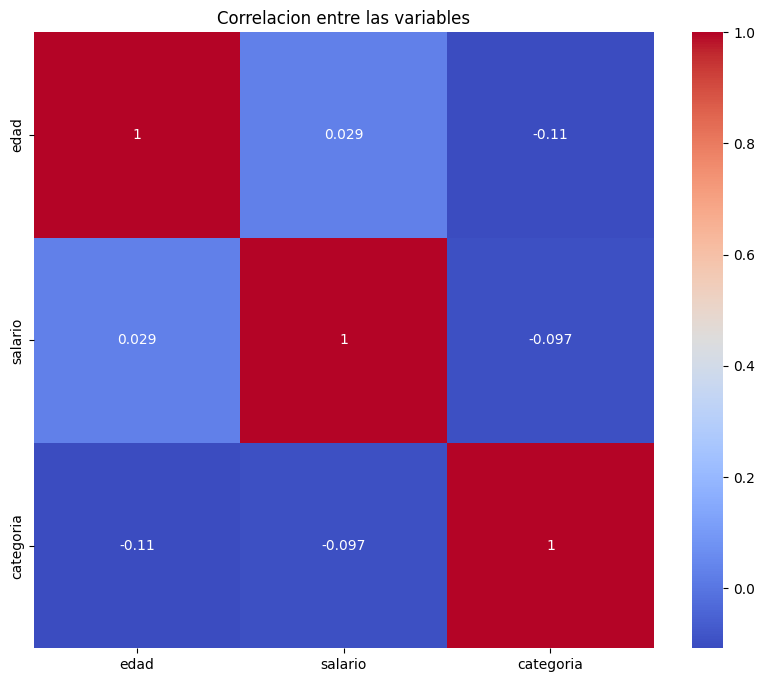

In [13]:
#mapa de calor de corelacion entre las variables
plt.figure(figsize=(10,8))
correlacion_matrix=df[['edad', 'salario','categoria']].corr()
heatmap=sns.heatmap(correlacion_matrix,annot=True,cmap='coolwarm')
heatmap.set(title="Correlacion entre las variables");